In [1]:
import os
import speech_recognition as sr
from pydub import AudioSegment

def split_audio_by_words(audio_path):
    # Load the audio file
    audio = AudioSegment.from_wav(audio_path)

    # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Open the audio file
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)

    # Perform speech recognition on the audio
    result = recognizer.recognize_google(audio_data)

    # Split the recognized text into words
    words = result.split()

    # Get the audio duration in milliseconds
    audio_duration = len(audio)

    # Create a directory to save the split audio files
    output_dir = os.path.splitext(audio_path)[0] + "_split"
    os.makedirs(output_dir, exist_ok=True)
    print(words)
    # Split the audio based on word boundaries
    for i, word in enumerate(words):
        start_time = int(audio_duration / len(words) * i)
        end_time = int(audio_duration / len(words) * (i + 1))
        split_audio_path = os.path.join(output_dir, f"{i+1}_{word}.wav")

        # Extract the segment of audio
        split_audio = audio[start_time:end_time]

        # Save the split audio to a file
        split_audio.export(split_audio_path, format="wav")

        print(f"Split audio {split_audio_path} created.")
        print(f"Start Time{start_time} End Time{end_time}")
        

    print("Audio splitting completed.")

# Provide the path to the audio file
audio_path = "yoyo.wav"

# Split the audio file by words
split_audio_by_words(audio_path)


c:\Users\baral\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


RequestError: recognition connection failed: [Errno 11001] getaddrinfo failed

In [2]:
import speech_recognition as sr
import wave

def detect_words(audio_file):
    """Detects words in an audio file and returns the time intervals for each word."""
    r = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio = r.record(source)

    try:
        text = r.recognize_google(audio)
    except sr.UnknownValueError:
        return None

    word_times = []
    words = text.split()

    with wave.open(audio_file, "rb") as wave_file:
        frame_rate = wave_file.getframerate()
        audio_duration = wave_file.getnframes() / frame_rate
        word_duration = audio_duration / len(words)

    for i, word in enumerate(words):
        start_time = i * word_duration
        end_time = (i + 1) * word_duration
        word_times.append((word, start_time, end_time))

    return word_times

if __name__ == "__main__":
    audio_file = "yoyo.wav"
    word_times = detect_words(audio_file)
    if word_times is None:
        print("No words detected.")
    else:
        for word, start_time, end_time in word_times:
            print(f"Word: {word}, Start Time: {start_time:.2f} seconds, End Time: {end_time:.2f} seconds")


RequestError: recognition connection failed: [Errno 11001] getaddrinfo failed

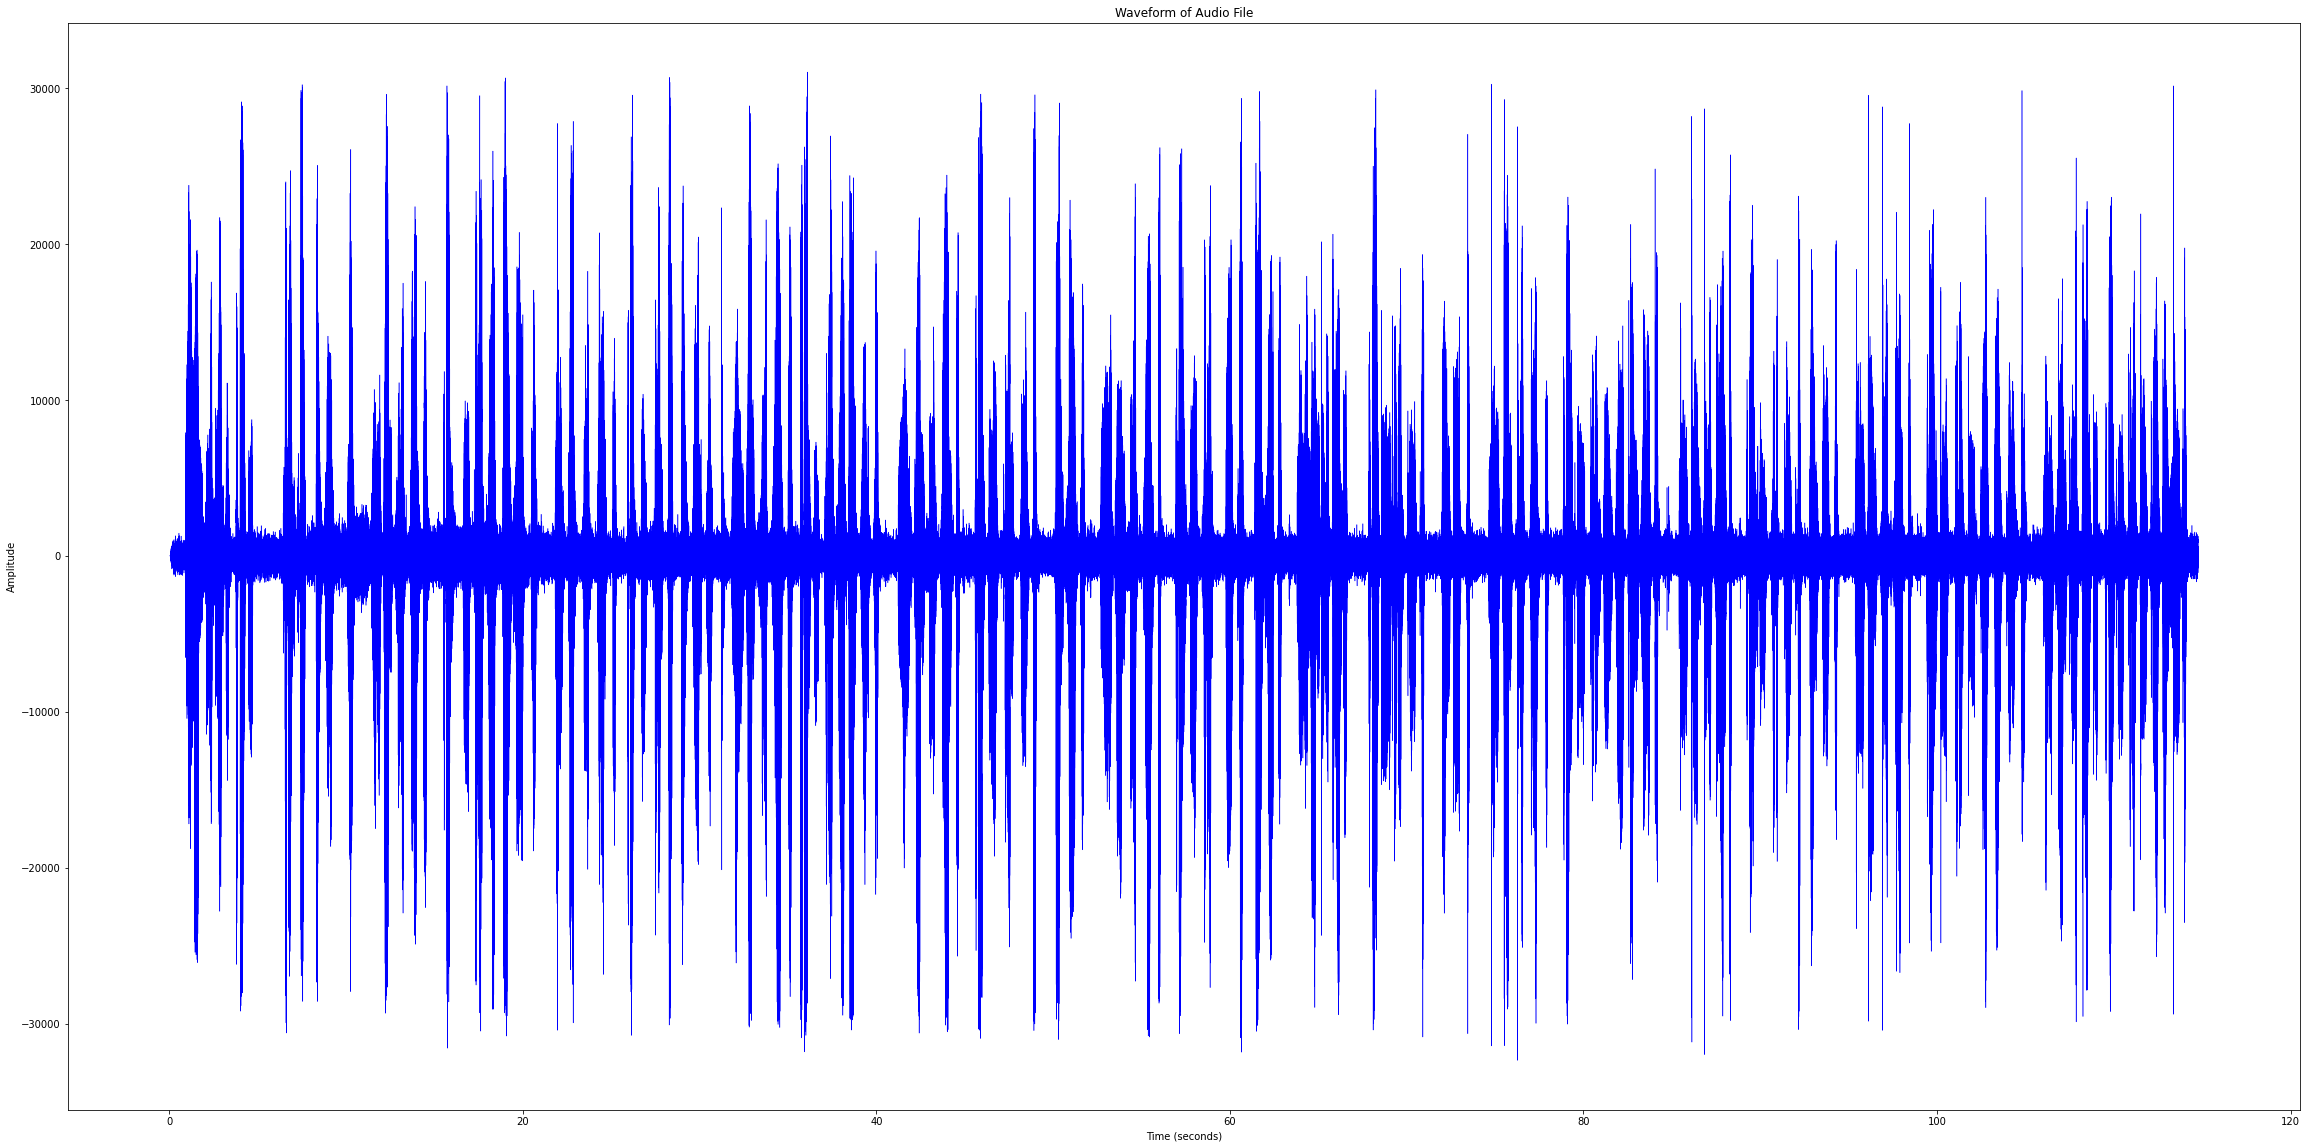

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

def display_waveform(audio_file):
    """Displays the waveforms of an audio file."""
    with wave.open(audio_file, "rb") as wave_file:
        frames = wave_file.readframes(-1)
        signal = np.frombuffer(frames, dtype="int16")
        frame_rate = wave_file.getframerate()
        duration = len(signal) / frame_rate

    time = np.linspace(0, duration, num=len(signal))

    plt.figure(figsize=(40, 20))
    plt.plot(time, signal, color="blue", linewidth=0.5)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform of Audio File")
    plt.show()

if __name__ == "__main__":
    audio_file = "yoyo.wav"
    display_waveform(audio_file)


In [ ]:
import speech_recognition as sr
from pydub import AudioSegment

def transcribe_audio(audio_file):
    """Transcribes the audio file and returns the recognized words with their time intervals."""
    r = sr.Recognizer()
    
    audio = AudioSegment.from_wav(audio_file)
    duration = len(audio) / 1000  # Duration in seconds

    word_times = []
    
    with sr.AudioFile(audio_file) as source:
        audio_data = r.record(source)
        try:
            words = r.recognize_google(audio_data, show_all=True)
        except sr.UnknownValueError:
            return None

        if "alternative" in words:
            alternatives = words["alternative"]
            word_count = len(alternatives[0]["transcript"].split())
            segment_duration = duration / word_count

            for i, alternative in enumerate(alternatives):
                word = alternative["transcript"]
                start_time = i * segment_duration
                end_time = (i + 1) * segment_duration
                word_times.append((word, start_time, end_time))

    return word_times

if __name__ == "__main__":
    audio_file = "hello.wav"
    recognized_words = transcribe_audio(audio_file)
    
    if recognized_words is None:
        print("No words recognized.")
    else:
        for word, start_time, end_time in recognized_words:
            print(f"Word: {word}, Start Time: {start_time:.2f} seconds, End Time: {end_time:.2f} seconds")


Word: Miro Miro Miro Miro Miro Naam Naam Naam Naam Naam Naam Saurabh Saurabh Saurabh Saurabh Baral Baral Baral ho ho tapai Ko tapay Ko Khabar I love you, Start Time: 0.00 seconds, End Time: 1.34 seconds
Word: Miro Miro Miro Miro Miro Naam Naam Naam Naam Naam Naam Saurabh Saurabh Saurabh Saurabh Baral Baral Baral ho ho tapai Ko tapay Ko Khabar I love u, Start Time: 1.34 seconds, End Time: 2.68 seconds
Word: Miro Miro Miro Miro Miro Naam Naam Naam Naam Naam Naam Saurabh Saurabh Saurabh Saurabh Baral Baral Baral ho ho ho tapai Ko tapay Ko Khabar I love you, Start Time: 2.68 seconds, End Time: 4.02 seconds
Word: Miro Miro Miro Miro Miro Naam Naam Naam Naam Naam Naam Saurabh Saurabh Saurabh Saurabh Baral Baral Baral ho ho ho tapai Ko tapay Ko Khabar I love u, Start Time: 4.02 seconds, End Time: 5.36 seconds
Word: Miro Miro Miro Miro Miro Naam Naam Naam Naam Naam Naam Sourabh Sourabh Sourabh Sourabh Baral Baral Baral ho ho tapai Ko tapay Ko Khabar I love you, Start Time: 5.36 seconds, End Ti